In [1]:
## import libraries
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector
import matplotlib.pyplot as plt
#import os
import tensorflow as tf
from keras.regularizers import l2

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
n_step = 9

In [4]:
def split(data, depth):
    dataset = data
    depth = depth
    X = np.zeros([int(depth), n_step, 3])
    Y = np.zeros([int(depth), n_step, 3])
    c = 0
    d = 0
    
    for i in range(int(depth)):
        for j in range(n_step):
            if d < dataset.shape[0]:
                X[i,j,:] = dataset[d, c:c+3]
                Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
                
                if ((c+3*n_step+3) != (dataset.shape[1])):
                    c +=3
                else:
                    c = 0
                    d += 1
        if (c-3) > 0:
            c = (c - 3*n_step + 3)
        else:
            c = c
            
    return X, Y

In [5]:
dataset = pd.read_csv('/home/lab606a/Documents/20200331/fixed/original data 60hz/top6.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(764, 111)

In [6]:
maxlen_train = dataset.shape[1]+(n_step-1)*3
maxlen_train

135

In [7]:
dataset = sequence.pad_sequences(dataset, maxlen=maxlen_train, padding='post', dtype='float32')
dataset.shape

(764, 135)

In [8]:
depth_train = (int(dataset.shape[1]/3)+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows

In [9]:
x_train, y_train = split(data=dataset, depth=depth_train)

In [29]:
model = Sequential()
model.add(LSTM(128, activation='linear', input_shape=(x_train.shape[1], x_train.shape[2]), unroll=True, return_sequences=True))
#model.add(LSTM(256, activation='linear', return_sequences=True))
#model.add(LSTM(128, activation='linear', return_sequences=True))
model.add(LSTM(64, activation='linear', unroll=True))
#model.add(LSTM(64, activation='linear'))
model.add(RepeatVector(x_train.shape[1]))
#model.add(LSTM(32, activation='linear', return_sequences=True))
model.add(LSTM(64, activation='linear', return_sequences=True, unroll=True))
#model.add(LSTM(128, activation='linear', return_sequences=True))
#model.add(LSTM(64, activation='linear', return_sequences=True))
model.add(LSTM(128, activation='linear', return_sequences=True, unroll=True))
model.add(TimeDistributed(Dense(3, activation='linear')))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 9, 128)            67584     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 9, 64)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 9, 64)             33024     
_________________________________________________________________
lstm_19 (LSTM)               (None, 9, 128)            98816     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 3)              387       
Total params: 249,219
Trainable params: 249,219
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(x_train, y_train, batch_size=2000, epochs=1000, shuffle=True)

Epoch 1/1000
21392/21392 [==============================] - 4s 204us/step - loss: 3526.7775 - acc: 0.4113
Epoch 2/1000
21392/21392 [==============================] - 0s 18us/step - loss: 2580.5686 - acc: 0.5319
Epoch 3/1000
21392/21392 [==============================] - 0s 18us/step - loss: 2799.1047 - acc: 0.4304
Epoch 4/1000
21392/21392 [==============================] - 0s 18us/step - loss: 2411.8468 - acc: 0.4983
Epoch 5/1000
21392/21392 [==============================] - 0s 18us/step - loss: 2116.1150 - acc: 0.5719
Epoch 6/1000
21392/21392 [==============================] - 0s 18us/step - loss: 1832.3907 - acc: 0.6011
Epoch 7/1000
21392/21392 [==============================] - 0s 18us/step - loss: 1596.2199 - acc: 0.6860
Epoch 8/1000
21392/21392 [==============================] - 0s 19us/step - loss: 1339.4841 - acc: 0.7668
Epoch 9/1000
21392/21392 [==============================] - 0s 18us/step - loss: 1037.8540 - acc: 0.8017
Epoch 10/1000
21392/21392 [===========================

21392/21392 [==============================] - 0s 18us/step - loss: 31.8959 - acc: 0.8241
Epoch 80/1000
21392/21392 [==============================] - 0s 18us/step - loss: 31.5606 - acc: 0.8225
Epoch 81/1000
21392/21392 [==============================] - 0s 19us/step - loss: 31.1737 - acc: 0.8245
Epoch 82/1000
21392/21392 [==============================] - 0s 18us/step - loss: 30.5993 - acc: 0.8211
Epoch 83/1000
21392/21392 [==============================] - 0s 18us/step - loss: 30.9641 - acc: 0.8280
Epoch 84/1000
21392/21392 [==============================] - 0s 18us/step - loss: 31.2042 - acc: 0.8188
Epoch 85/1000
21392/21392 [==============================] - 0s 18us/step - loss: 30.2014 - acc: 0.8205
Epoch 86/1000
21392/21392 [==============================] - 0s 19us/step - loss: 29.8691 - acc: 0.8174
Epoch 87/1000
21392/21392 [==============================] - 0s 18us/step - loss: 30.7972 - acc: 0.8225
Epoch 88/1000
21392/21392 [==============================] - 0s 19us/step - lo

21392/21392 [==============================] - 0s 19us/step - loss: 21.0908 - acc: 0.8168
Epoch 158/1000
21392/21392 [==============================] - 0s 18us/step - loss: 21.1251 - acc: 0.8253
Epoch 159/1000
21392/21392 [==============================] - 0s 18us/step - loss: 20.1080 - acc: 0.8232
Epoch 160/1000
21392/21392 [==============================] - 0s 18us/step - loss: 20.1093 - acc: 0.8272
Epoch 161/1000
21392/21392 [==============================] - 0s 18us/step - loss: 20.1022 - acc: 0.8232
Epoch 162/1000
21392/21392 [==============================] - 0s 18us/step - loss: 19.5723 - acc: 0.8234
Epoch 163/1000
21392/21392 [==============================] - 0s 18us/step - loss: 19.8343 - acc: 0.8218
Epoch 164/1000
21392/21392 [==============================] - 0s 19us/step - loss: 19.3326 - acc: 0.8269
Epoch 165/1000
21392/21392 [==============================] - 0s 18us/step - loss: 19.3396 - acc: 0.8230
Epoch 166/1000
21392/21392 [==============================] - 0s 19us/

21392/21392 [==============================] - 0s 18us/step - loss: 16.2713 - acc: 0.8290
Epoch 236/1000
21392/21392 [==============================] - 0s 18us/step - loss: 15.2113 - acc: 0.8239
Epoch 237/1000
21392/21392 [==============================] - 0s 19us/step - loss: 15.3965 - acc: 0.8344
Epoch 238/1000
21392/21392 [==============================] - 0s 18us/step - loss: 17.0989 - acc: 0.8290
Epoch 239/1000
21392/21392 [==============================] - 0s 19us/step - loss: 18.7916 - acc: 0.8283
Epoch 240/1000
21392/21392 [==============================] - 0s 18us/step - loss: 17.8675 - acc: 0.8312
Epoch 241/1000
21392/21392 [==============================] - 0s 19us/step - loss: 17.0686 - acc: 0.8329
Epoch 242/1000
21392/21392 [==============================] - 0s 18us/step - loss: 17.2997 - acc: 0.8295
Epoch 243/1000
21392/21392 [==============================] - 0s 18us/step - loss: 18.3824 - acc: 0.8252
Epoch 244/1000
21392/21392 [==============================] - 0s 18us/

21392/21392 [==============================] - 0s 19us/step - loss: 13.8986 - acc: 0.8198
Epoch 314/1000
21392/21392 [==============================] - 0s 19us/step - loss: 14.2079 - acc: 0.8249
Epoch 315/1000
21392/21392 [==============================] - 0s 19us/step - loss: 14.2842 - acc: 0.8213
Epoch 316/1000
21392/21392 [==============================] - 0s 18us/step - loss: 14.6618 - acc: 0.8327
Epoch 317/1000
21392/21392 [==============================] - 0s 19us/step - loss: 16.3273 - acc: 0.8411
Epoch 318/1000
21392/21392 [==============================] - 0s 18us/step - loss: 16.0876 - acc: 0.8186
Epoch 319/1000
21392/21392 [==============================] - 0s 19us/step - loss: 16.5612 - acc: 0.8299
Epoch 320/1000
21392/21392 [==============================] - 0s 19us/step - loss: 16.8717 - acc: 0.8272
Epoch 321/1000
21392/21392 [==============================] - 0s 19us/step - loss: 17.1133 - acc: 0.8212
Epoch 322/1000
21392/21392 [==============================] - 0s 19us/

21392/21392 [==============================] - 0s 18us/step - loss: 13.4744 - acc: 0.8220
Epoch 392/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.4180 - acc: 0.8185
Epoch 393/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.2440 - acc: 0.8220
Epoch 394/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.7740 - acc: 0.8186
Epoch 395/1000
21392/21392 [==============================] - 0s 19us/step - loss: 14.0018 - acc: 0.8168
Epoch 396/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.9547 - acc: 0.8254
Epoch 397/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.7275 - acc: 0.8227
Epoch 398/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.7743 - acc: 0.8339
Epoch 399/1000
21392/21392 [==============================] - 0s 18us/step - loss: 13.1318 - acc: 0.8160
Epoch 400/1000
21392/21392 [==============================] - 0s 19us/

21392/21392 [==============================] - 0s 19us/step - loss: 12.2106 - acc: 0.8140
Epoch 470/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.2388 - acc: 0.8059
Epoch 471/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.0968 - acc: 0.8196
Epoch 472/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.5287 - acc: 0.8097
Epoch 473/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.6169 - acc: 0.8125
Epoch 474/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.4545 - acc: 0.8120
Epoch 475/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.1667 - acc: 0.8116
Epoch 476/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.3306 - acc: 0.8207
Epoch 477/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.0402 - acc: 0.8115
Epoch 478/1000
21392/21392 [==============================] - 0s 18us/

21392/21392 [==============================] - 0s 19us/step - loss: 11.1912 - acc: 0.8095
Epoch 548/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.5751 - acc: 0.8081
Epoch 549/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.3759 - acc: 0.8178
Epoch 550/1000
21392/21392 [==============================] - 0s 18us/step - loss: 11.0197 - acc: 0.8041
Epoch 551/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.5875 - acc: 0.8164
Epoch 552/1000
21392/21392 [==============================] - 0s 18us/step - loss: 11.9897 - acc: 0.8133
Epoch 553/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.4285 - acc: 0.7989
Epoch 554/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.6637 - acc: 0.8086
Epoch 555/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.6297 - acc: 0.8144
Epoch 556/1000
21392/21392 [==============================] - 0s 19us/

21392/21392 [==============================] - 0s 19us/step - loss: 16.3120 - acc: 0.8084
Epoch 626/1000
21392/21392 [==============================] - 0s 19us/step - loss: 15.9705 - acc: 0.8273
Epoch 627/1000
21392/21392 [==============================] - 0s 19us/step - loss: 21.5368 - acc: 0.8102
Epoch 628/1000
21392/21392 [==============================] - 0s 19us/step - loss: 22.6587 - acc: 0.8343
Epoch 629/1000
21392/21392 [==============================] - 0s 19us/step - loss: 19.2502 - acc: 0.8149
Epoch 630/1000
21392/21392 [==============================] - 0s 19us/step - loss: 18.4333 - acc: 0.8133
Epoch 631/1000
21392/21392 [==============================] - 0s 19us/step - loss: 16.1911 - acc: 0.8229
Epoch 632/1000
21392/21392 [==============================] - 0s 19us/step - loss: 15.0968 - acc: 0.8199
Epoch 633/1000
21392/21392 [==============================] - 0s 19us/step - loss: 15.4306 - acc: 0.8122
Epoch 634/1000
21392/21392 [==============================] - 0s 19us/

21392/21392 [==============================] - 0s 19us/step - loss: 11.7056 - acc: 0.8118
Epoch 704/1000
21392/21392 [==============================] - 0s 19us/step - loss: 13.0660 - acc: 0.8219
Epoch 705/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.1597 - acc: 0.8336
Epoch 706/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.7052 - acc: 0.7999
Epoch 707/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.6267 - acc: 0.8076
Epoch 708/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.5188 - acc: 0.8161
Epoch 709/1000
21392/21392 [==============================] - 0s 18us/step - loss: 12.2780 - acc: 0.8073
Epoch 710/1000
21392/21392 [==============================] - 0s 19us/step - loss: 12.0126 - acc: 0.8215
Epoch 711/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.3238 - acc: 0.8205
Epoch 712/1000
21392/21392 [==============================] - 0s 19us/

21392/21392 [==============================] - 0s 19us/step - loss: 12.0134 - acc: 0.8074
Epoch 782/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.2600 - acc: 0.8125
Epoch 783/1000
21392/21392 [==============================] - 0s 18us/step - loss: 10.8830 - acc: 0.8140
Epoch 784/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.9969 - acc: 0.8116
Epoch 785/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.8608 - acc: 0.8134
Epoch 786/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.7408 - acc: 0.8203
Epoch 787/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.5011 - acc: 0.8174
Epoch 788/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.0373 - acc: 0.8144
Epoch 789/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.2690 - acc: 0.8251
Epoch 790/1000
21392/21392 [==============================] - 0s 19us/step

21392/21392 [==============================] - 0s 19us/step - loss: 9.8877 - acc: 0.8183
Epoch 860/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.6140 - acc: 0.8236
Epoch 861/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.0261 - acc: 0.8072
Epoch 862/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.2955 - acc: 0.8134
Epoch 863/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.9799 - acc: 0.8255
Epoch 864/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.2024 - acc: 0.8142
Epoch 865/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.1624 - acc: 0.8161
Epoch 866/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.5143 - acc: 0.8130
Epoch 867/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.0341 - acc: 0.8151
Epoch 868/1000
21392/21392 [==============================] - 0s 19us/ste

21392/21392 [==============================] - 0s 19us/step - loss: 10.4166 - acc: 0.8168
Epoch 938/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.2600 - acc: 0.8182
Epoch 939/1000
21392/21392 [==============================] - 0s 19us/step - loss: 11.3875 - acc: 0.8126
Epoch 940/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.8020 - acc: 0.8320
Epoch 941/1000
21392/21392 [==============================] - 0s 18us/step - loss: 8.9127 - acc: 0.8155
Epoch 942/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.8374 - acc: 0.8122
Epoch 943/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.0750 - acc: 0.8295
Epoch 944/1000
21392/21392 [==============================] - 0s 19us/step - loss: 9.9448 - acc: 0.8271
Epoch 945/1000
21392/21392 [==============================] - 0s 19us/step - loss: 10.0198 - acc: 0.8133
Epoch 946/1000
21392/21392 [==============================] - 0s 19us/ste

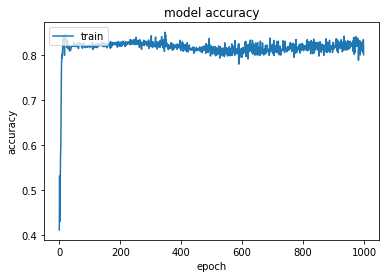

In [32]:
# plot accuracy history
# summarize history for accuracy 
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#acc_png = './training history/' + file_name + '_accuracy.png'
#plt.savefig(acc_png)
plt.show()

In [33]:
print(x_train[0,:,:])
print(y_train[0,:,:])

[[ 73.18540192 301.99398804  42.11090088]
 [ 72.646698   288.92001343  45.14080048]
 [ 72.13159943 278.0369873   46.79240036]
 [ 71.39499664 267.5960083   48.37919998]
 [ 70.69390106 256.41598511  49.8409996 ]
 [ 70.25659943 245.84300232  50.75859833]
 [ 69.3730011  236.82699585  51.02030182]
 [ 68.77970123 223.98399353  51.49610138]
 [ 68.19650269 213.86599731  51.18999863]]
[[ 67.41020203 205.13900757  50.11029816]
 [ 66.69329834 193.96499634  49.36529922]
 [ 66.20950317 183.38600159  48.25370026]
 [ 65.76039886 172.47099304  46.9756012 ]
 [ 65.12719727 162.81300354  45.43470001]
 [ 64.32460022 153.51699829  43.04650116]
 [ 63.77140045 143.19900513  40.7317009 ]
 [ 63.02619934 134.63999939  37.86869812]
 [ 62.36389923 124.41799927  34.95500183]]


In [34]:
np.set_printoptions(suppress=True)

In [35]:
y_pred = model.predict(x_train[0,:,:].reshape(1,9,3), verbose=1)
print(y_pred)

1/1 [==============================] - 1s 950ms/step
[[[ 73.986824 195.92392   46.163208]
  [ 68.96843  185.7958    45.714695]
  [ 69.87259  179.00165   46.05542 ]
  [ 70.59791  167.86461   45.103355]
  [ 71.8184   158.82956   43.621086]
  [ 71.08498  148.76181   41.340855]
  [ 70.32786  139.44875   39.29984 ]
  [ 69.70871  129.42589   36.53006 ]
  [ 69.867424 121.19157   33.38273 ]]]


In [36]:
#
error = y_train[0,:,:].reshape(1,9,3)-y_pred
error

array([[[-6.57662201,  9.21508789,  3.94709015],
        [-2.27513123,  8.16918945,  3.65060425],
        [-3.66308594,  4.38435364,  2.19828033],
        [-4.83750916,  4.60638428,  1.87224579],
        [-6.69120026,  3.98344421,  1.81361389],
        [-6.76037598,  4.75518799,  1.70564651],
        [-6.55645752,  3.7502594 ,  1.43186188],
        [-6.68251038,  5.21411133,  1.33863831],
        [-7.50352478,  3.2264328 ,  1.57227325]]])

In [37]:
#model.save('./saved model/60hz_9steps_128_20200421/prediction_right6')